In [1]:
import os
import glob
from IPython.display import Image,display

In [2]:
!nvidia-smi

Mon Apr 22 08:03:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
HOME = "/content/"
print(HOME)

/content/


In [4]:
!pip install ultralytics==8.0.0

In [5]:
import ultralytics

In [6]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/78.2 GB disk)


In [7]:
!mkdir {HOME}/dataset

mkdir: cannot create directory ‘/content//dataset’: File exists


In [8]:
%cd {HOME}/dataset

/content/dataset


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3NAKhwLQlC68SAid23Eb")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [10]:
%cd {HOME}

/content


In [11]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/dataset/road_signs/data.yaml epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 166MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset/road_signs/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_

In [13]:
!ls /content/runs/detect/train

args.yaml					    results.csv		 val_batch0_labels.jpg
confusion_matrix.png				    results.png		 val_batch0_pred.jpg
events.out.tfevents.1713773159.e9e38eeeb29c.2406.0  train_batch0.jpg	 val_batch1_labels.jpg
F1_curve.png					    train_batch1.jpg	 val_batch1_pred.jpg
P_curve.png					    train_batch2.jpg	 val_batch2_labels.jpg
PR_curve.png					    train_batch7740.jpg  val_batch2_pred.jpg
predictions.json				    train_batch7741.jpg  weights
R_curve.png					    train_batch7742.jpg


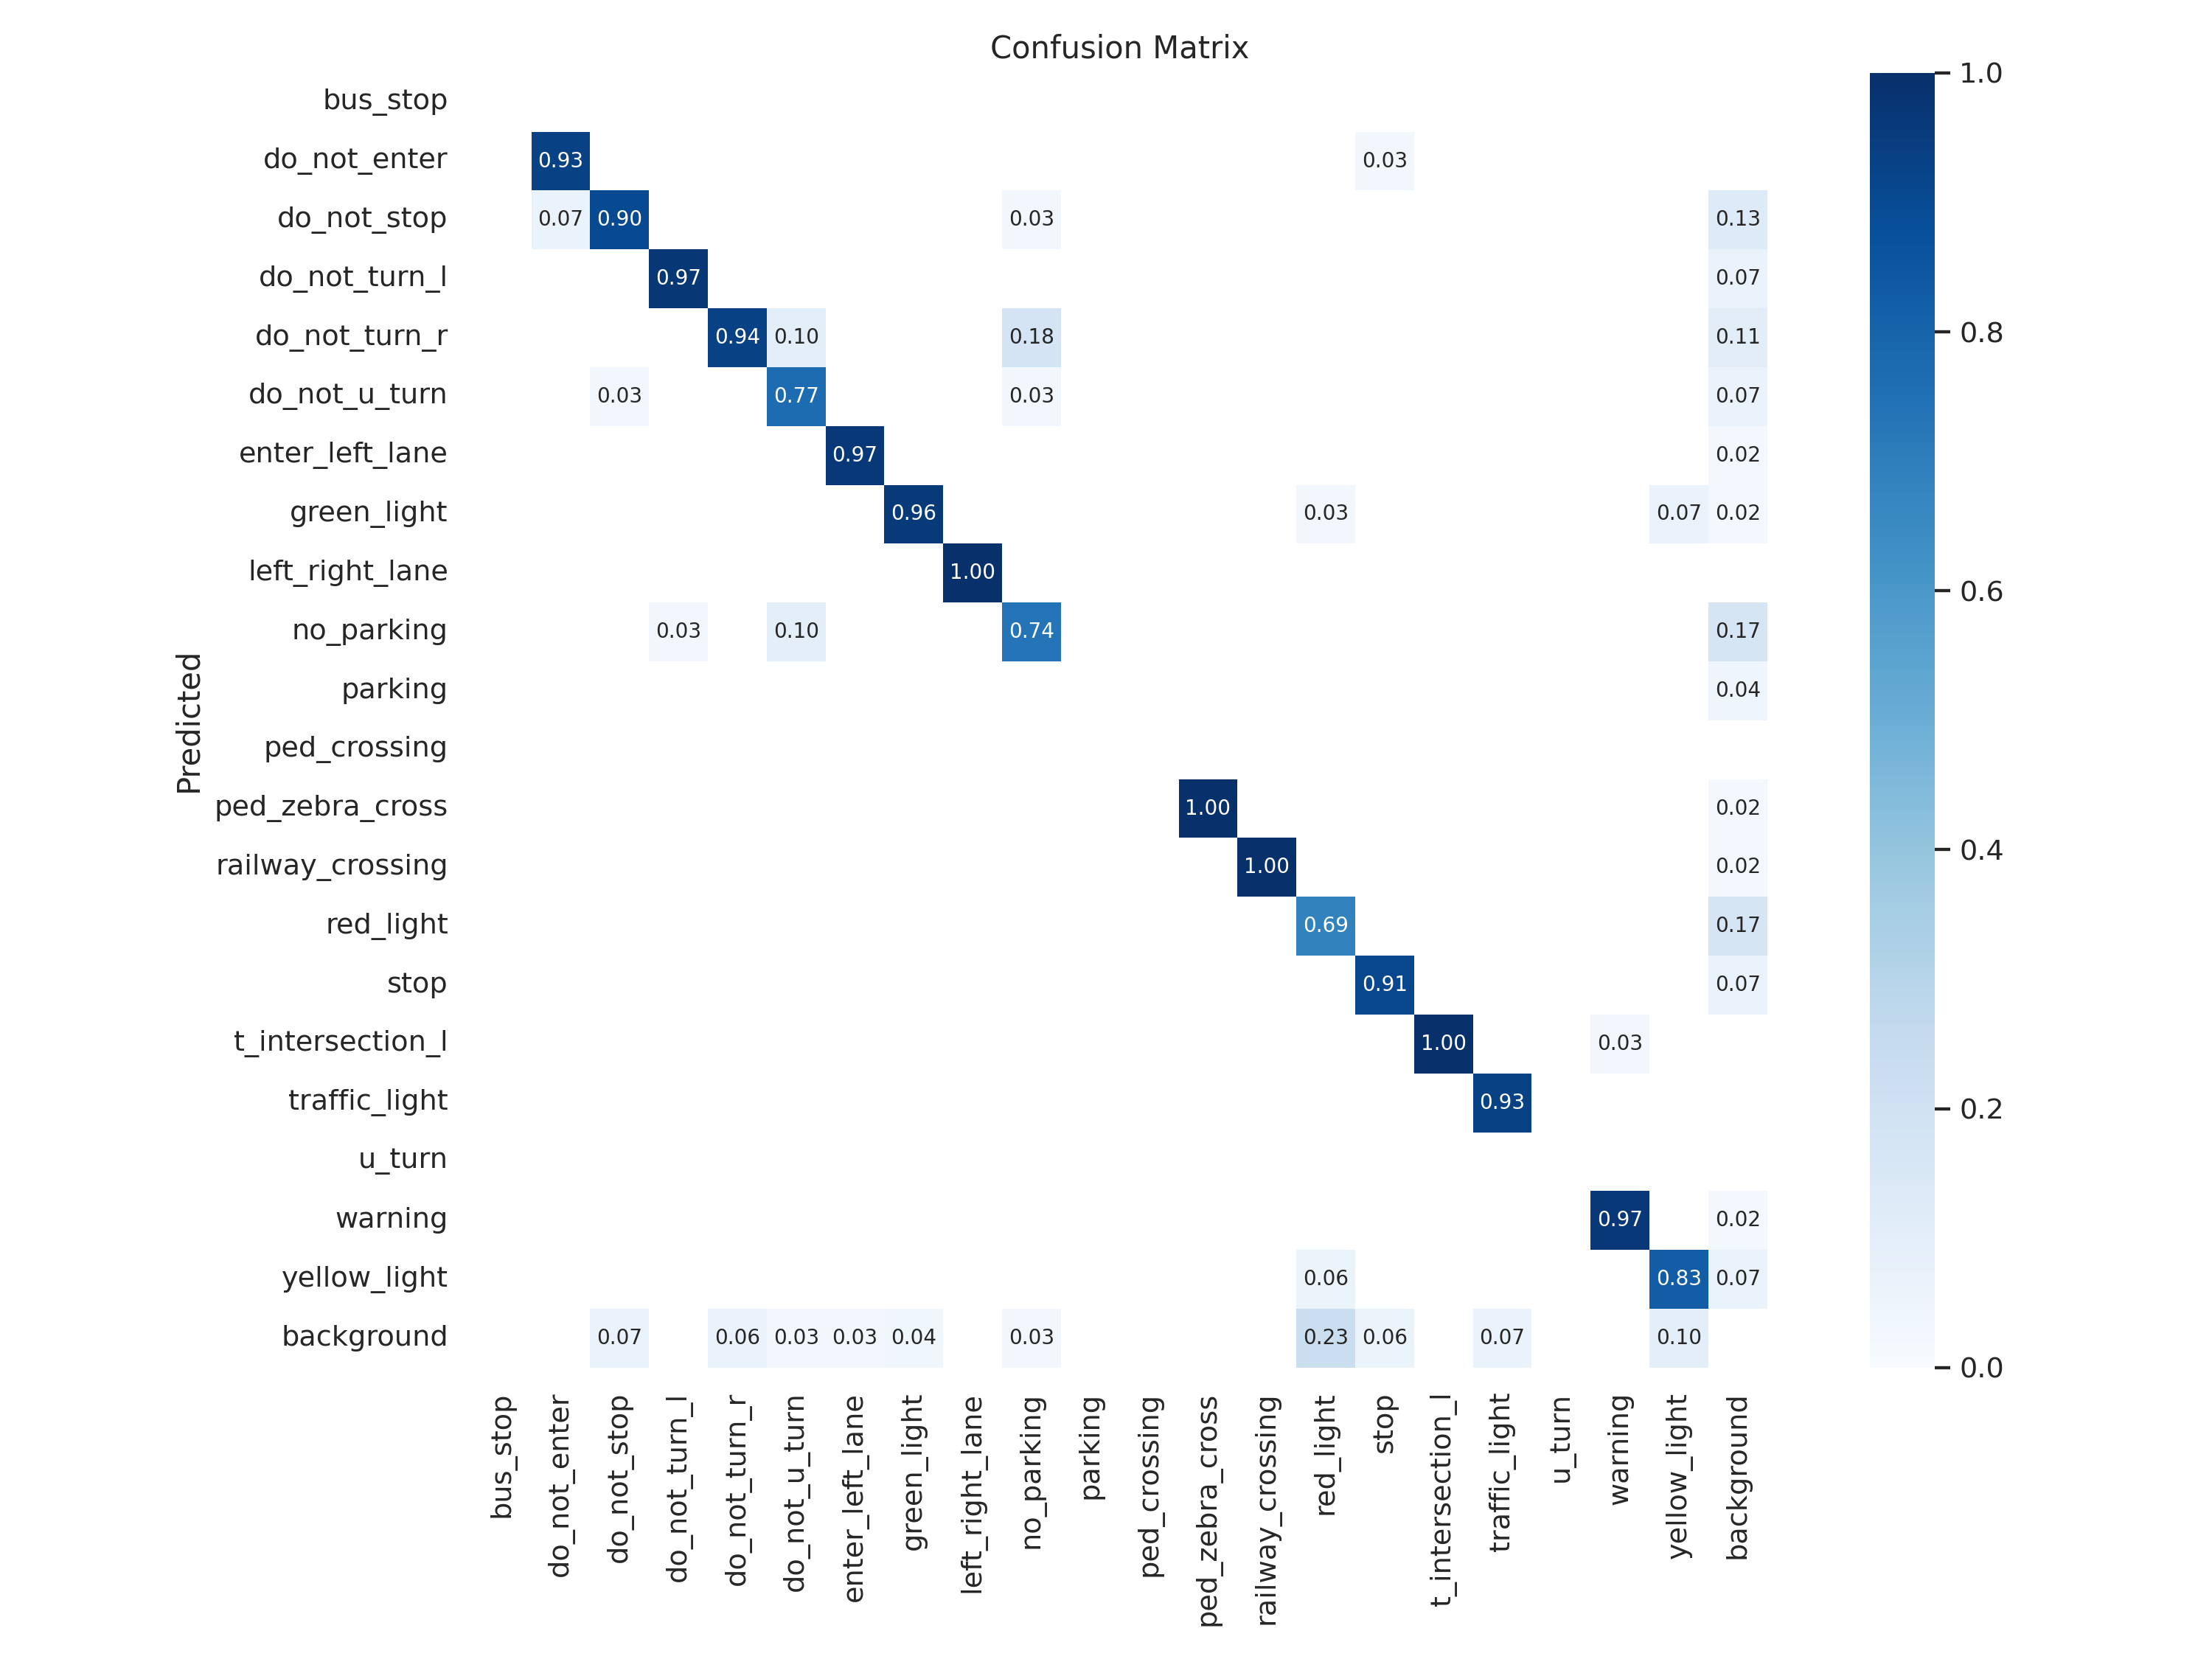

In [14]:
Image(filename = f"/content/runs/detect/train/confusion_matrix.png")

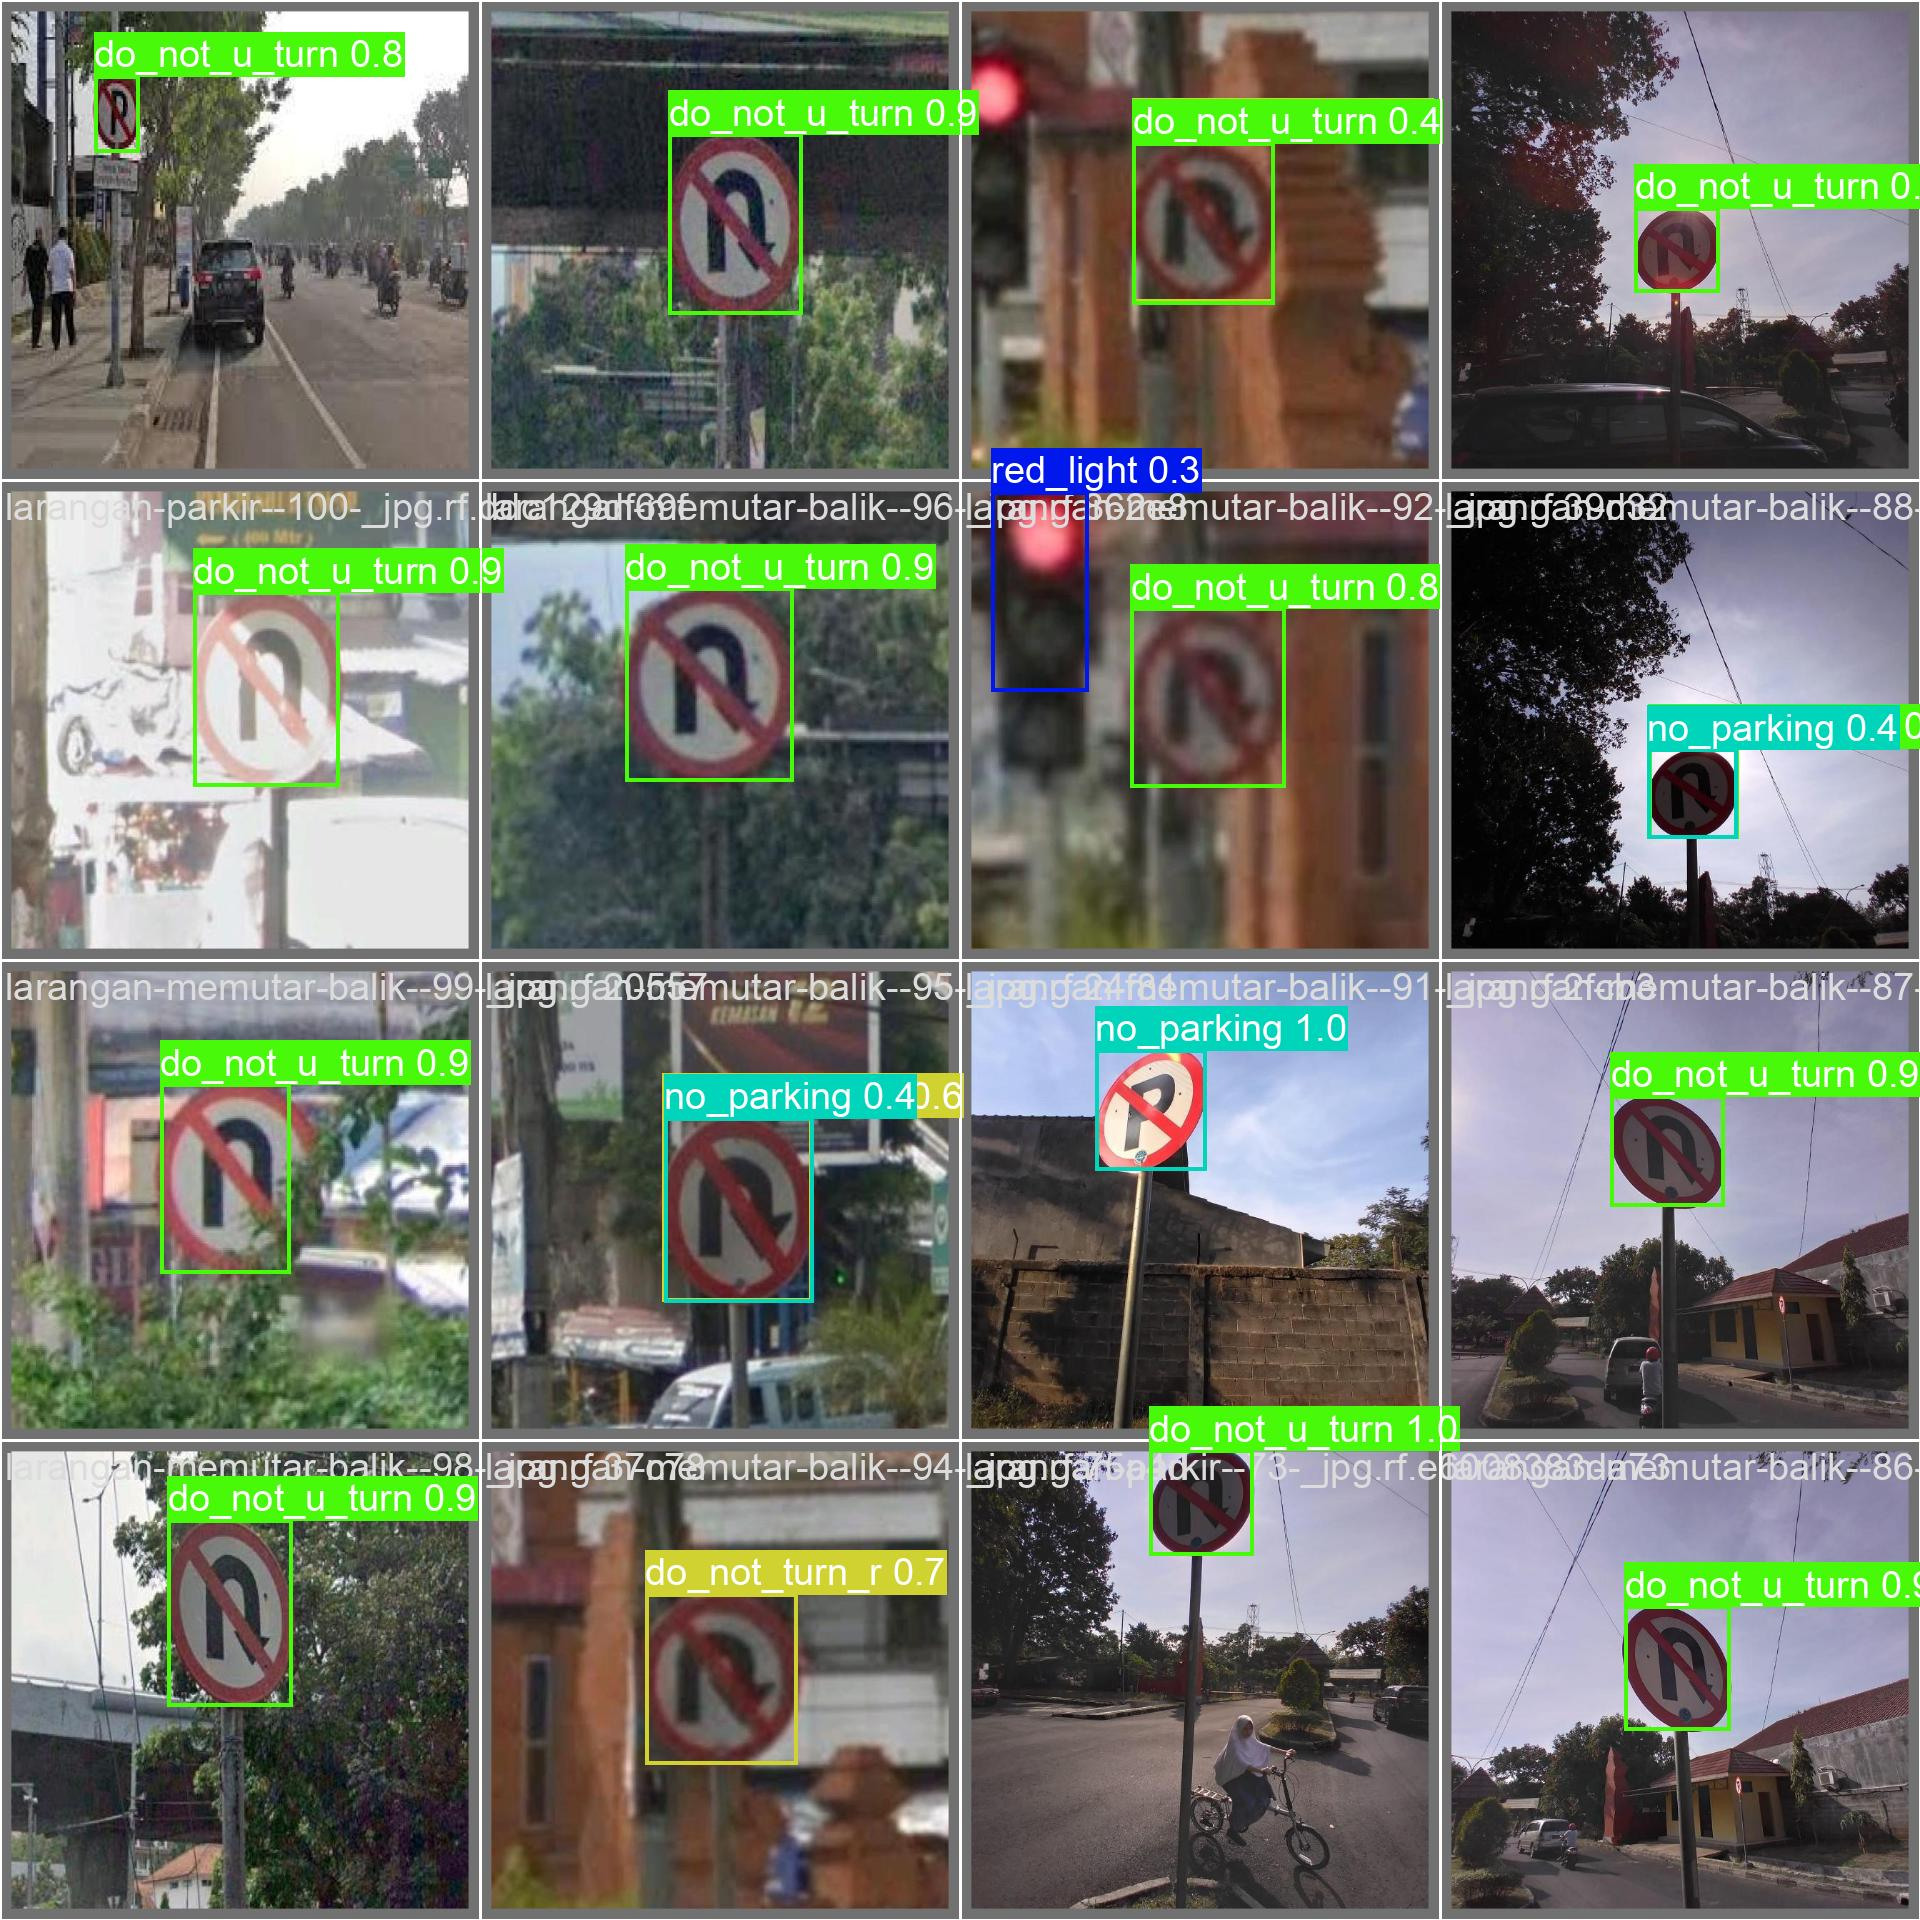

In [15]:
Image(filename = f"/content/runs/detect/train/val_batch2_pred.jpg", height=500)

In [16]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/dataset/road_signs/data.yaml

2024-04-22 09:53:08.261095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 09:53:08.261168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 09:53:08.263028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 09:53:09.891319: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/dataset/road_signs/valid/labels.cache... 

In [18]:
!gdown "https://drive.google.com/drive/u/0/folders/18LVcfFZDwxT6uCb91rKHXqv0o2ulKey4"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/0/folders/18LVcfFZDwxT6uCb91rKHXqv0o2ulKey4
To: /content/18LVcfFZDwxT6uCb91rKHXqv0o2ulKey4
1.14MB [00:00, 897MB/s]


In [20]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Roadsign detection/videoTest/greensignal.mp4"

2024-04-22 10:02:27.116482: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 10:02:27.116531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 10:02:27.117780: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 10:02:28.370666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/275) /con

In [21]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/Roadsign detection/videoTest/stopsign.mp4"

2024-04-22 10:06:36.036368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 10:06:36.036428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 10:06:36.038320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 10:06:37.571639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/240) /content/drive/MyDrive/Roadsign detection/vide